<h1 style='color: #3062ab; font-size: 34px; font-weight: bold;'> Previsão da taxa de mortalidade infantil em um país

</h1>


# <font color="#ab3c30" style="font-size: 30px;">Objetivo</font>
<hr style="border: 2px solid #ab3c30;">

 <p style='font-size: 23px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i><b> Prever a taxa de mortalidade infantil com base em diferentes varíaveis socioeconômicas, históricas, etc. </b></i>     
</p>

---

# <font color="#ab3c30" style="font-size: 30px;">Roteiro</font>
<hr style="border: 2px solid #ab3c30;">

<h1 style='color: black; font-size:22px; font-weight: bold;'> 1. Pré-processamento de dados
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'>2. Análise exploratória de dados

</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
3. Modelagem de dados
</h1>

---

<h1 style='color: black; font-size: 22px; font-weight: bold;'> 
4. Comunicação de Resultados
</h1>


# <font color="#ab3c30" style='font-size: 30px;'>1. Pré-processamento de dados    </font>

<hr style="border: 2px solid #ab3c30;">

In [638]:
# IMPORTANDO BIBLIOTECAS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [639]:
df = pd.read_csv('world-data-2023.csv')

df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [640]:
# RENOMEANDO COLUNAS

traducao = {
    'Country': 'País',
    'Density\n(P/Km2)': 'Densidade (Pessoas por quilômetro quadrado)',
    'Abbreviation': 'Abreviação',
    'Agricultural Land( %)': 'Área de Terras Agrícolas (%)',
    'Land Area(Km2)': 'Área Terrestre (quilômetros quadrados)',
    'Armed Forces size': 'Tamanho das Forças Armadas',
    'Birth Rate': 'Taxa de Natalidade',
    'Calling Code': 'Código de Chamada Telefônica',
    'Capital/Major City': 'Capital/Cidade Principal',
    'Co2-Emissions': 'Emissões de CO2',
    'CPI': 'Índice de Percepção de Corrupção',
    'CPI Change (%)': 'Mudança no Índice de Percepção de Corrupção (%)',
    'Currency-Code': 'Código de Moeda',
    'Fertility Rate': 'Taxa de Fertilidade',
    'Forested Area (%)': 'Área Florestal (%)',
    'Gasoline Price': 'Preço da Gasolina',
    'GDP': 'Produto Interno Bruto (PIB)',
    'Gross primary education enrollment (%)': 'Matrícula Bruta na Educação Primária (%)',
    'Gross tertiary education enrollment (%)': 'Matrícula Bruta na Educação Terciária (%)',
    'Infant mortality': 'Mortalidade Infantil',
    'Largest city': 'Maior Cidade',
    'Life expectancy': 'Expectativa de Vida',
    'Maternal mortality ratio': 'Razão de Mortalidade Materna',
    'Minimum wage': 'Salário Mínimo',
    'Official language': 'Língua Oficial',
    'Out of pocket health expenditure': 'Gastos com Saúde Paga pelo Paciente',
    'Physicians per thousand': 'Médicos por mil habitantes',
    'Population': 'População',
    'Population: Labor force participation (%)': 'Participação da Força de Trabalho na População (%)',
    'Tax revenue (%)': 'Receita de Impostos (%)',
    'Total tax rate': 'Taxa Total de Impostos',
    'Unemployment rate': 'Taxa de Desemprego',
    'Urban_population': 'População Urbana',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude'
}

df = df.rename(columns=traducao)
df

,País,Densidade (Pessoas por quilômetro quadrado),Abreviação,Área de Terras Agrícolas (%),Área Terrestre (quilômetros quadrados),Tamanho das Forças Armadas,Taxa de Natalidade,Código de Chamada Telefônica,Capital/Cidade Principal,Emissões de CO2,...,Gastos com Saúde Paga pelo Paciente,Médicos por mil habitantes,População,Participação da Força de Trabalho na População (%),Receita de Impostos (%),Taxa Total de Impostos,Taxa de Desemprego,População Urbana,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


---
## <font color=#62ab30 style="font-size: 30px;">1.1 Remover colunas que não são relevantes para o problema de previsão de taxa de mortalidade infantil.</font>

---

In [641]:
# Eliminando o NaN do dataset

df = df.dropna()

In [642]:
# Identificando as colunas que são strings
colunas_string = df.select_dtypes(include='object').columns.tolist()

# Depois nos vamos tentar ajustar o formato de todas as strings numéricas para análise posterior

In [643]:
# Identificar as colunas com strings numéricas
def e_string_numerica(s):
    s = s.strip().replace(',', '').replace('%', '')
    try:
        if s:
            float(s)
            return True
    except ValueError:
        pass
    return False

cols_string_numerica = [col for col in colunas_string if df[col].apply(e_string_numerica).all()]

# Substituir vírgulas por pontos apenas nas colunas com strings numéricas
for col in cols_string_numerica :
    df[col] = df[col].apply(lambda x: x.replace(',', '').replace('%', '') if e_string_numerica(x) else x)

df

C:\Users\Miguel Freire\AppData\Local\Temp\ipykernel_11800\1093512900.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: x.replace(',', '').replace('%', '') if e_string_numerica(x) else x)


,País,Densidade (Pessoas por quilômetro quadrado),Abreviação,Área de Terras Agrícolas (%),Área Terrestre (quilômetros quadrados),Tamanho das Forças Armadas,Taxa de Natalidade,Código de Chamada Telefônica,Capital/Cidade Principal,Emissões de CO2,...,Gastos com Saúde Paga pelo Paciente,Médicos por mil habitantes,População,Participação da Força de Trabalho na População (%),Receita de Impostos (%),Taxa Total de Impostos,Taxa de Desemprego,População Urbana,Latitude,Longitude
0,Afghanistan,60,AF,58.10,652230,323000,32.49,93.0,Kabul,8672,...,78.40,0.28,38041754,48.90,9.30,71.40,11.12,9797273,33.939110,67.709953
1,Albania,105,AL,43.10,28748,9000,11.78,355.0,Tirana,4536,...,56.90,1.20,2854191,55.70,18.60,36.60,12.33,1747593,41.153332,20.168331
2,Algeria,18,DZ,17.40,2381741,317000,24.28,213.0,Algiers,150006,...,28.10,1.72,43053054,41.20,37.20,66.10,11.70,31510100,28.033886,1.659626
4,Angola,26,AO,47.50,1246700,117000,40.73,244.0,Luanda,34693,...,33.40,0.21,31825295,77.50,9.20,49.10,6.89,21061025,-11.202692,17.873887
6,Argentina,17,AR,54.30,2780400,105000,17.02,54.0,Buenos Aires,201348,...,17.60,3.96,44938712,61.30,10.10,106.30,9.79,41339571,-38.416097,-63.616672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,United Kingdom,281,GB,71.70,243610,148000,11.00,44.0,London,379025,...,14.80,2.81,66834405,62.80,25.50,30.60,3.85,55908316,55.378051,-3.435973
186,United States,36,US,44.40,9833517,1359000,11.60,1.0,"Washington, D.C.",5006302,...,11.10,2.61,328239523,62.00,9.60,36.60,14.70,270663028,37.090240,-95.712891
187,Uruguay,20,UY,82.60,176215,22000,13.86,598.0,Montevideo,6766,...,16.20,5.05,3461734,64.00,20.10,41.80,8.73,3303394,-32.522779,-55.765835
191,Vietnam,314,VN,39.30,331210,522000,16.75,84.0,Hanoi,192668,...,43.50,0.82,96462106,77.40,19.10,37.60,2.01,35332140,14.058324,108.277199


In [644]:
# Transformando todas as strings númericas em objetos do tipo float

df.loc[:, numeric_string_cols] = df.loc[:, numeric_string_cols].astype(float)

C:\Users\Miguel Freire\AppData\Local\Temp\ipykernel_11800\1179021508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, numeric_string_cols] = df.loc[:, numeric_string_cols].astype(float)
C:\Users\Miguel Freire\AppData\Local\Temp\ipykernel_11800\1179021508.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, numeric_string_cols] = df.loc[:, numeric_string_cols].astype(float)


---
## <font color=#62ab30 style="font-size: 30px;">Entendendo quais colunas serão interessante para analisarmos e utilizarmos num modelo de machine learning.</font>

---


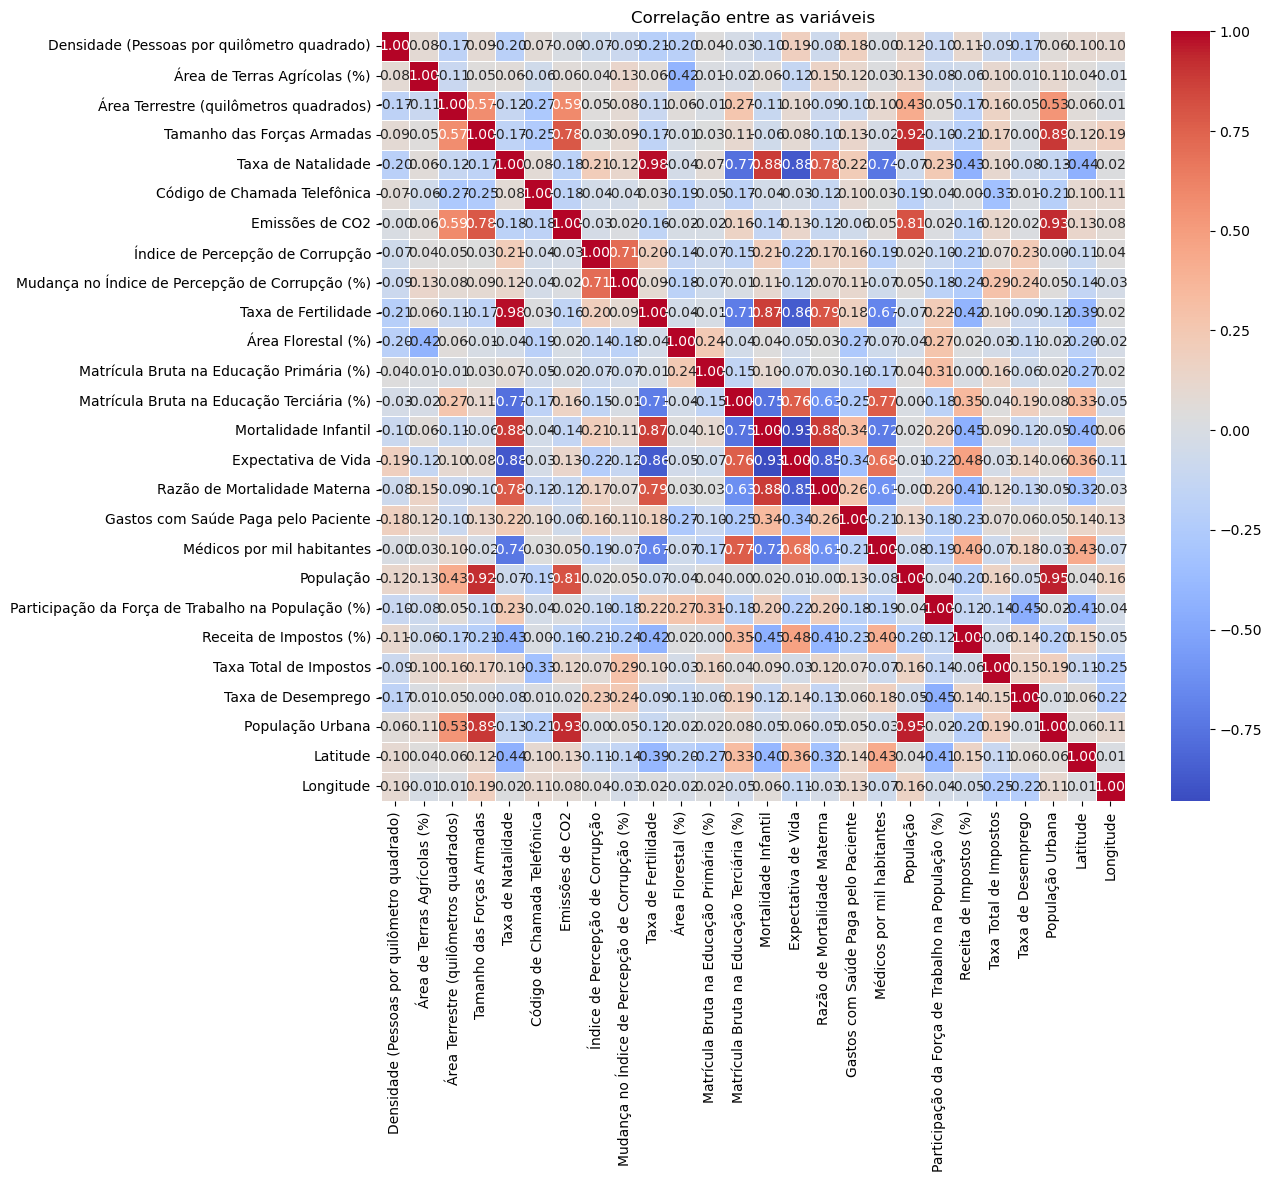

In [645]:

df_correlação = df.corr(numeric_only=True)

# Criar o heatmap 
plt.figure(figsize=(12, 10))  # Define o tamanho da figura
sns.heatmap(df_correlação, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre as variáveis')
plt.show()

In [646]:
df_correlação = df_correlação[['Mortalidade Infantil','Matrícula Bruta na Educação Terciária (%)', 'Gastos com Saúde Paga pelo Paciente', 'Razão de Mortalidade Materna', 'Médicos por mil habitantes']]
df = pd.concat([df[df_correlação.columns], df['País']], axis=1)
df

,Mortalidade Infantil,Matrícula Bruta na Educação Terciária (%),Gastos com Saúde Paga pelo Paciente,Razão de Mortalidade Materna,Médicos por mil habitantes,País
0,47.9,9.7,78.4,638.0,0.28,Afghanistan
1,7.8,55.0,56.9,15.0,1.20,Albania
2,20.1,51.4,28.1,112.0,1.72,Algeria
4,51.6,9.3,33.4,241.0,0.21,Angola
6,8.8,90.0,17.6,39.0,3.96,Argentina
...,...,...,...,...,...,...
185,3.6,60.0,14.8,7.0,2.81,United Kingdom
186,5.6,88.2,11.1,19.0,2.61,United States
187,6.4,63.1,16.2,17.0,5.05,Uruguay
191,16.5,28.5,43.5,43.0,0.82,Vietnam


# <font color="#ab3c30" style='font-size: 30px;'>2. Análise exploratória de dados</font>

<hr style="border: 2px solid #ab3c30;">

---
## <font color=#62ab30 style="font-size: 30px;">Gráfico de Barras para a Distribuição da Taxa de Mortalidade Infantil por País.</font>

---


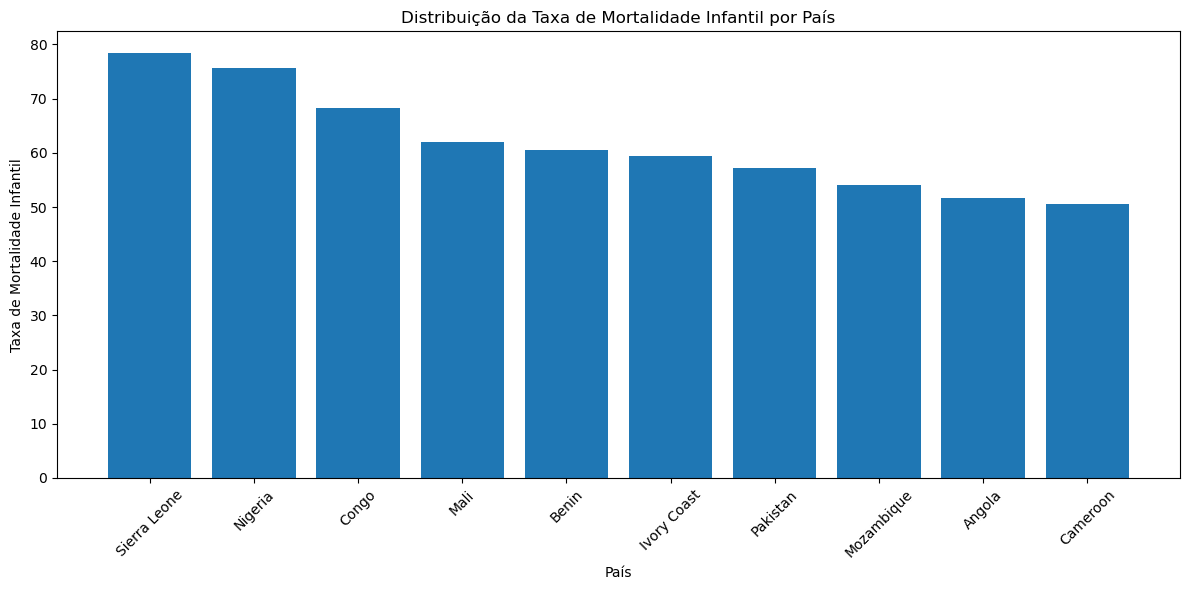

In [656]:
df_pais = df.sort_values(by='Mortalidade Infantil', axis=0, ascending=False)

# Alterando o nome do país onde a coluna 'País' é igual a 'Democratic Republic of the Congo' para 'Congo'
df_pais.loc[df['País'] == 'Democratic Republic of the Congo', 'País'] = 'Congo'

# Dados
paises = df_pais['País'].head(10)
mortalidade_infantil = df_pais['Mortalidade Infantil'].head(10)

# Gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(paises, mortalidade_infantil)
plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Taxa de Mortalidade Infantil')
plt.title('Distribuição da Taxa de Mortalidade Infantil por País')
plt.tight_layout()
plt.show()


---
## <font color=#62ab30 style="font-size: 30px;">Gráfico de Dispersão para Visualizar a Relação entre a Taxa de Mortalidade Infantil e o Número de Médicos por Mil Habitantes:</font>

---


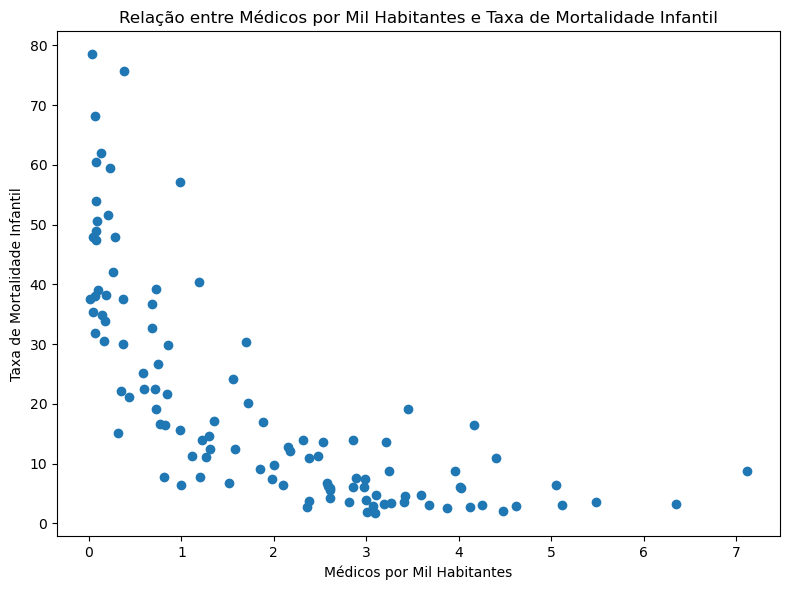

In [658]:
# Dados
medicos_por_mil = df['Médicos por mil habitantes']
mortalidade_infantil = df['Mortalidade Infantil']

# Gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(medicos_por_mil, mortalidade_infantil)
plt.xlabel('Médicos por Mil Habitantes')
plt.ylabel('Taxa de Mortalidade Infantil')
plt.title('Relação entre Médicos por Mil Habitantes e Taxa de Mortalidade Infantil')
plt.tight_layout()
plt.show()
